In [1]:
import sklearn.model_selection as sk
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 

In [56]:
#Make regression dataset

#X,y=make_regression(n_samples=5000,n_features=2000,n_informative=2000,noise=50)
X,y=make_friedman1(n_samples=5000, n_features=2000,  noise=50, random_state=None)

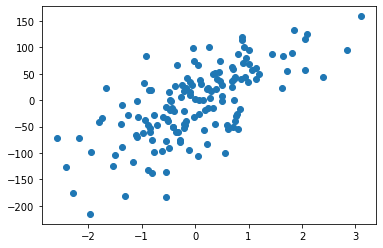

In [36]:
pyplot.scatter(X,y)
pyplot.show()

In [12]:

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [14]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [15]:
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.3, random_state=123)

In [16]:
X_train=np.array(X_train)
Y_train=np.array(y_train)
X_test=np.array(X_test)
Y_test=np.array(y_test)

In [17]:
# Normalization

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [48]:
Y_train=Y_train/100
Y_test=Y_test/100

In [4]:
data_train = tf.cast(X_train,tf.float32)

NameError: name 'X_train' is not defined

In [19]:
labels_train = tf.cast(Y_train, tf.float32)

In [20]:
data_test = tf.cast(X_test, tf.float32)
labels_test = tf.cast(Y_test, tf.float32)

<tf.Tensor: id=3, shape=(3500,), dtype=float32, numpy=
array([-1259.1865 ,  1063.8015 ,  -925.0276 , ...,  1279.0381 ,
         524.08026,  -670.9818 ], dtype=float32)>

In [11]:
np.savetxt("data_train.data", data_train)
np.savetxt("data_test.data", data_test)
np.savetxt("labels_test.data", labels_test)
np.savetxt("labels_train.data", labels_train)
        

In [2]:
        data_train=np.loadtxt("data_train.data")
        labels_train=np.loadtxt("labels_train.data")
        data_test=np.loadtxt("data_test.data")
        labels_test=np.loadtxt("labels_test.data")

In [3]:
x_train=data_train
y_train=labels_train
x_test=data_test
y_test=labels_test


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(100, activation='linear', input_shape=(13,)))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(100, activation='elu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1)
model.save("WEIGHTS"+'/'+"model"+str(1))
model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

354/354 [==============================] - 0s 144us/sample - loss: 7.3138 - mean_squared_error: 7.3138
Epoch 57/100
354/354 [==============================] - 0s 117us/sample - loss: 7.2244 - mean_squared_error: 7.2244
Epoch 58/100
354/354 [==============================] - 0s 117us/sample - loss: 7.1432 - mean_squared_error: 7.1432
Epoch 59/100
354/354 [==============================] - 0s 130us/sample - loss: 6.6728 - mean_squared_error: 6.6728
Epoch 60/100
354/354 [==============================] - 0s 103us/sample - loss: 7.0874 - mean_squared_error: 7.0874
Epoch 61/100
354/354 [==============================] - 0s 139us/sample - loss: 6.4086 - mean_squared_error: 6.4086
Epoch 62/100
354/354 [==============================] - 0s 127us/sample - loss: 6.4900 - mean_squared_error: 6.4900
Epoch 63/100
354/354 [==============================] - 0s 138us/sample - loss: 6.3628 - mean_squared_error: 6.3628
Epoch 64/100
354/354 [==============================] - 0s 147us/sample - loss: 6.055

[13.226044755232962, 13.226046]

In [13]:
truncated-----14.30, 22.56, 17.46, 15.51

152/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [3]:
overtrained----13.49, 12.07, 12.55, 13.67, 15.26, 15.86, 13,14.9, 16.47, 15.51, 12.55
truncated------18.29,

In [50]:
y_pred=model(x_test)

In [49]:
y_true=tf.reshape(y_test,(len(y_test),1))

In [53]:
np.mean(tf.keras.losses.MSE(y_true, y_pred))

14.306395

In [38]:
y_test

array([15.        , 26.60000038, 45.40000153, 20.79999924, 34.90000153,
       21.89999962, 28.70000076,  7.19999981, 20.        , 32.20000076,
       24.10000038, 18.5       , 13.5       , 27.        , 23.10000038,
       18.89999962, 24.5       , 43.09999847, 19.79999924, 13.80000019,
       15.60000038, 50.        , 37.20000076, 46.        , 50.        ,
       21.20000076, 14.89999962, 19.60000038, 19.39999962, 18.60000038,
       26.5       , 32.        , 10.89999962, 20.        , 21.39999962,
       31.        , 25.        , 15.39999962, 13.10000038, 37.59999847,
       37.        , 18.89999962, 27.89999962, 50.        , 14.39999962,
       22.        , 19.89999962, 21.60000038, 15.60000038, 15.        ,
       32.40000153, 29.60000038, 20.39999962, 12.30000019, 19.10000038,
       14.89999962, 17.79999924,  8.80000019, 35.40000153, 11.5       ,
       19.60000038, 20.60000038, 15.60000038, 19.89999962, 23.29999924,
       22.29999924, 24.79999924, 16.10000038, 22.79999924, 30.5 

In [15]:
Kmean=KMeans(n_clusters=3)
Kmean.fit(data_train)

KMeans(n_clusters=3)

In [16]:
Kmean.labels_

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [22]:

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_train, labels, metric = 'euclidean'))

In [10]:
sil

[0.3702484711208639,
 0.2632383497160655,
 0.2888659398076396,
 0.2880088870572478,
 0.29884195325892743,
 0.2737859540507855,
 0.28353360335803107,
 0.2846758851445227,
 0.2913167214278734,
 0.3053912661178809,
 0.29101500600394986,
 0.2840519801595975,
 0.2695282510340254,
 0.2903754297114718,
 0.2925622278765131,
 0.2779338420424268,
 0.28319764113941653,
 0.27119573416286874,
 0.2572006008125852,
 0.28163528824684764,
 0.2831332221961422,
 0.2888016623012743,
 0.2909180257513012,
 0.290125482435202,
 0.29539674519910125,
 0.2582800202542239,
 0.2752278299091471,
 0.274074905890665,
 0.2653297895227251,
 0.282671841717905,
 0.26854262932842776,
 0.2718001099508357,
 0.27827169734247725,
 0.26250621675782426,
 0.2819203645164336,
 0.2751766326283766,
 0.2913236177476869,
 0.26844923899517387,
 0.26676910319257685,
 0.2615434395146003,
 0.2638991813234472,
 0.28176425027394486,
 0.26853250922161653,
 0.2628392408986684,
 0.2686095121833706,
 0.2884776008609961,
 0.263525444216967,
 0.

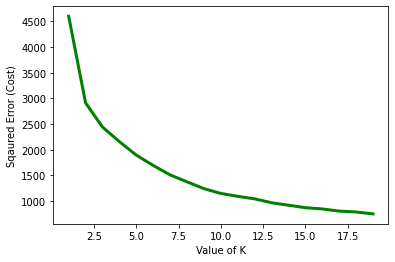

In [24]:
cost =[]
for i in range(1, 20):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X_train)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 20), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot